### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import plotly.express as px

import matplotlib.pyplot as plt

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.cluster import AgglomerativeClustering


In [1]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(2240, 29)
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object
ID                      0
Year_Birth              0
Education               

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [2]:
df['Income'] = df['Income'].fillna(df['Income'].median())

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [3]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Customer_For_Days'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days
df = df.drop(columns=['Dt_Customer', 'ID'])
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'])

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [4]:
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, labels)
print(score)

0.10818131488906838


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [5]:
df_viz = df.copy()
df_viz['Cluster'] = labels

fig = px.scatter_3d(df_viz,
                    x='Income',
                    y='NumWebPurchases',
                    z='MntWines',
                    color='Cluster',
                    opacity=0.7)
fig.show()


**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans_scaled = KMeans(n_clusters=3, random_state=42)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)

silhouette_scaled = silhouette_score(X_scaled, labels_scaled)
print(f"Силует після масштабування: {silhouette_scaled:.4f}")

Силует після масштабування: 0.0888


**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [7]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

columns_with_outliers = ['Income', 'MntWines']
df_clean = remove_outliers_iqr(df.copy(), columns_with_outliers)

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

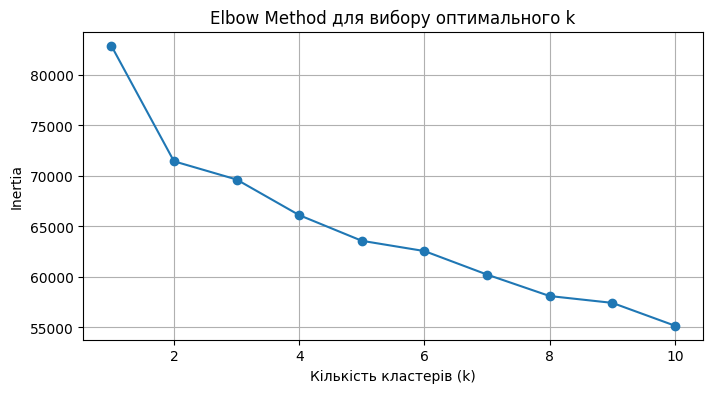

Силуетна метрика для k=4: 0.0901


In [11]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method для вибору оптимального k')
plt.grid(True)
plt.show()

optimal_k = 4

kmeans_opt = KMeans(n_clusters=optimal_k, random_state=42)
clusters_opt = kmeans_opt.fit_predict(X_scaled)

silhouette_opt = silhouette_score(X_scaled, clusters_opt)
print(f"Силуетна метрика для k={optimal_k}: {silhouette_opt:.4f}")

df_viz = df.copy()
df_viz['Cluster'] = clusters_opt

fig = px.scatter_3d(df_viz,
                    x='Income',
                    y='NumWebPurchases',
                    z='MntWines',
                    color='Cluster',
                    title=f'3D Візуалізація кластерів для k={optimal_k}')
fig.show()

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

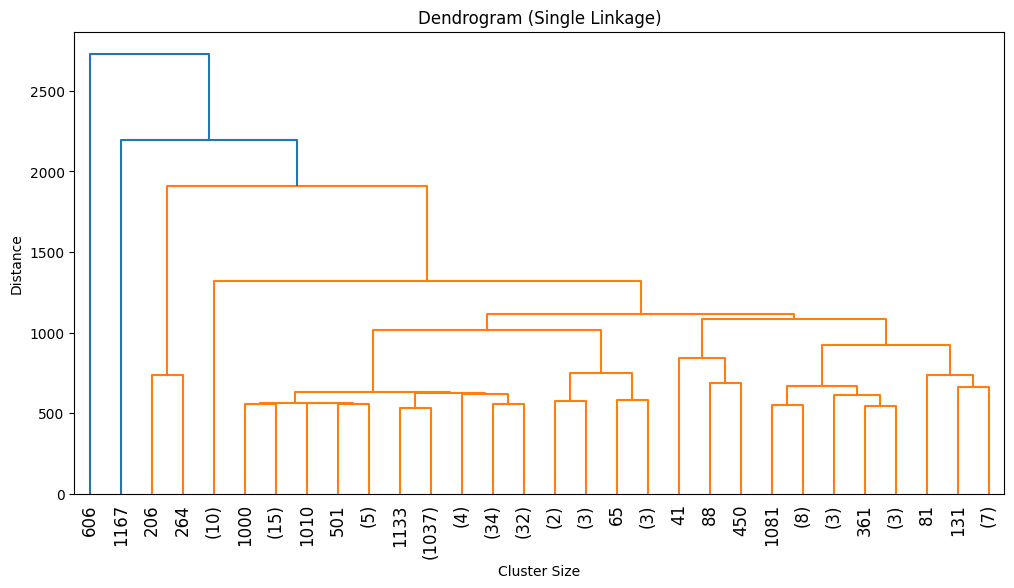

Силует для 2 кластерів: 0.5078
Силует для 3 кластерів: 0.2433


<ipython-input-19-e504da3aec9c>:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-e504da3aec9c>:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

df.dropna(inplace=True)

df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

df['Customer_For'] = (pd.Timestamp("today") - df['Dt_Customer']).dt.days
df.drop(columns=['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True)

numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

X_unscaled = df_clean.copy()

Z = linkage(X_unscaled, method='single')

plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

clusters_2 = fcluster(Z, 2, criterion='maxclust')
clusters_3 = fcluster(Z, 3, criterion='maxclust')

df_clean['Cluster_2'] = clusters_2
df_clean['Cluster_3'] = clusters_3

silhouette_2 = silhouette_score(X_unscaled, clusters_2)
silhouette_3 = silhouette_score(X_unscaled, clusters_3)

print(f"Силует для 2 кластерів: {silhouette_2:.4f}")
print(f"Силует для 3 кластерів: {silhouette_3:.4f}")

fig_2 = px.scatter_3d(df_clean, x='Income', y='MntWines', z='NumWebPurchases',
                      color='Cluster_2', title='Single Linkage, 2 кластери')
fig_2.show()

fig_3 = px.scatter_3d(df_clean, x='Income', y='MntWines', z='NumWebPurchases',
                      color='Cluster_3', title='Single Linkage, 3 кластери')
fig_3.show()

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [20]:
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_clustering.fit_predict(X_scaled)

silhouette = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for Agglomerative Clustering: {silhouette}")

df_viz = df.copy()
df_viz['Cluster'] = labels

fig = px.scatter_3d(df_viz,
                    x='Income',
                    y='NumWebPurchases',
                    z='MntWines',
                    color='Cluster',
                    opacity=0.7,
                    title='Agglomerative Clustering with Ward Linkage (3 clusters)')
fig.show()

cluster_summary = df_viz.groupby('Cluster').agg({
    'Income': 'mean',
    'NumWebPurchases': 'mean',
    'MntWines': 'mean',
    'Kidhome': 'mean',
    'Teenhome': 'mean'
}).round(2)
print("\nCluster Summary Statistics:")
print(cluster_summary)

Silhouette Score for Agglomerative Clustering: 0.11587244910278255



Cluster Summary Statistics:
           Income  NumWebPurchases  MntWines  Kidhome  Teenhome
Cluster                                                        
0        39422.74             3.01    119.25     0.67      0.53
1        66322.10             5.50    471.69     0.16      0.56
2        78705.02             5.59    807.84     0.07      0.22


**Висновки**

Кластеризація показала три групи клієнтів: перша з доходом ~39,423 і витратами на вино ~119, друга з доходом ~66,322 і витратами ~472, третя з доходом ~78,705 і витратами ~808. Ці групи допомагають зрозуміти, як краще продавати: дешевші товари для перших, середні для других і дорогі для третіх. Щоб точно сказати, чи це краще за KMeans, треба порівняти метрику, але ці сегменти вже виглядають корисними.
